<a href="https://colab.research.google.com/github/lnunezma/Rentavariableyderivados22/blob/main/Practica1__.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PRACTICA 1 - BONOS SINTÉTICOS Y FORWARD**

Calcular el precio y la TIR del bono X conocidos los bonos A, B, C y E que cotizan en un mercado de renta fija. Realice por dos métodos al menos.



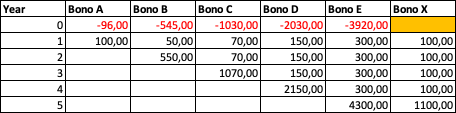

In [ ]:
pip install numpy-financial

In [ ]:
import numpy_financial as npf

#PASO 1 - CALCULAR LA TIR DE LOS BONOS A,B,C,D,E
bonoA = [-96,100,0,0,0,0]
bonoB = [-545,50,550,0,0,0]
bonoC = [-1030,70,70,1070,0,0]
bonoD = [-2030,150,150,150,2150,0]
bonoE = [-3920,300,300,300,300,4300]

tirA = npf.irr(bonoA)
tirB = npf.irr(bonoB)
tirC = npf.irr(bonoC)
tirD = npf.irr(bonoD)
tirE = npf.irr(bonoE)

print(f"La TIR del bono A es: {tirA:.2%}")
print(f"La TIR del bono B es: {tirB:.2%}")
print(f"La TIR del bono C es: {tirC:.2%}")
print(f"La TIR del bono D es: {tirD:.2%}")
print(f"La TIR del bono E es: {tirE:.2%}")
print()

# PASO 2 - CALCULAMOS LA ETTI Y EL FACTOR DE DESCUENTO
etti_calculada = [0,0,0,0,0]  # inicializamos el array
etti_calculada[0] = tirA  # la ETTI del año 1 es la TIR del bono A por ser un bono cupón cero a un año
def calcula_etti(bono, etti_calculada):
    n = [i for i, e in enumerate(bono) if e != 0][-1]
    ultimo_flujo = bono[n]
    precio = -bono[0]
    fcid = 0 # inicializamos los flujos de caja intermedios descontados
    for t in range(1,n): # recorre los flujos de caja intermedios
        fcid += bono[t] / (1+etti_calculada[t-1])**t
    return (ultimo_flujo / (precio - fcid))**(1/n)-1

r02 = calcula_etti(bonoB, etti_calculada) # calculamos r02 conocido el bono B y r01
etti_calculada[1] = r02

r03 = calcula_etti(bonoC, etti_calculada) # calculamos r03 conocido el bono C, r01 y r02
etti_calculada[2] = r03

r04 = calcula_etti(bonoD, etti_calculada) # calculamos r04 conocido el bono d, r01, r02 y r03
etti_calculada[3] = r04

r05 = calcula_etti(bonoE, etti_calculada) # calculamos r05 conocido el bono E, r01, r02, r03 y r04
etti_calculada[4] = r05

# Imprime la etti_calculada
for i in range(len(etti_calculada)):
    print(f"La ETTI del año {i+1} es {etti_calculada[i]:.2%}")


#PASO 3 - CALCULAMOS EL PRECIO Y LA TIR DEL BONO X
bonoX = [0,100,100,100,100,1100]
etti = [.1, .2, .3]
def precio_etti(flujos, etti):
    precio = 0
    for i in range(1, len(flujos)):
        precio += flujos[i] * (1+etti_calculada[i-1])**-i
    return precio

precioX = precio_etti(bonoX, etti)
print(f"El precio del bono X es {precioX:,.2f} €")
print()

# Calcular la TIR del bono X 
bonoX[0] = -precioX
tirX = npf.irr(bonoX)
print(f"La TIR del bono X es: {tirX:.2%}")
print()



La TIR del bono A es: 4.17%
La TIR del bono B es: 5.15%
La TIR del bono C es: 5.88%
La TIR del bono D es: 7.06%
La TIR del bono E es: 8.00%

La ETTI del año 1 es 4.17%
La ETTI del año 2 es 5.20%
La ETTI del año 3 es 5.95%
La ETTI del año 4 es 7.26%
La ETTI del año 5 es 8.33%
El precio del bono X es 1,083.25 €

La TIR del bono X es: 7.92%

